# To build a model for training and testing:

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import os
import numpy as np # linear algebra
import matplotlib.pyplot as plt

In [3]:
# Dl framwork - tensorflow, keras a backend 
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization 
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from IPython.display import display
from os import listdir
from os.path import isfile, join
from PIL import Image
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
dir_name_train_Defective = 'dataset/Train/Defective'

dir_name_train_non_defective = 'dataset/Train/Non defective'



In [6]:
def plot_images(item_dir, n=6):
    all_item_dir = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dir][:n]
    
    plt.figure(figsize=(35, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(2, n, idx+1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()

In [7]:
def Images_details_Print_data(data, path):
    print(" ====== Images in: ", path)    
    for k, v in data.items():
        print("%s:\t%s" % (k, v))

def Images_details(path):
    files = [f for f in glob.glob(path + "**/*.*", recursive=True)]
    data = {}
    data['images_count'] = len(files)
    data['min_width'] = 10**100  # No image will be bigger than that
    data['max_width'] = 0
    data['min_height'] = 10**100  # No image will be bigger than that
    data['max_height'] = 0


    for f in files:
        im = Image.open(f)
        width, height = im.size
        data['min_width'] = min(width, data['min_width'])
        data['max_width'] = max(width, data['max_height'])
        data['min_height'] = min(height, data['min_height'])
        data['max_height'] = max(height, data['max_height'])

    Images_details_Print_data(data, path)


Trained data for Defective train track:

 ====== Images in:  dataset/Train/Defective
images_count:	150
min_width:	156
max_width:	6000
min_height:	148
max_height:	6000



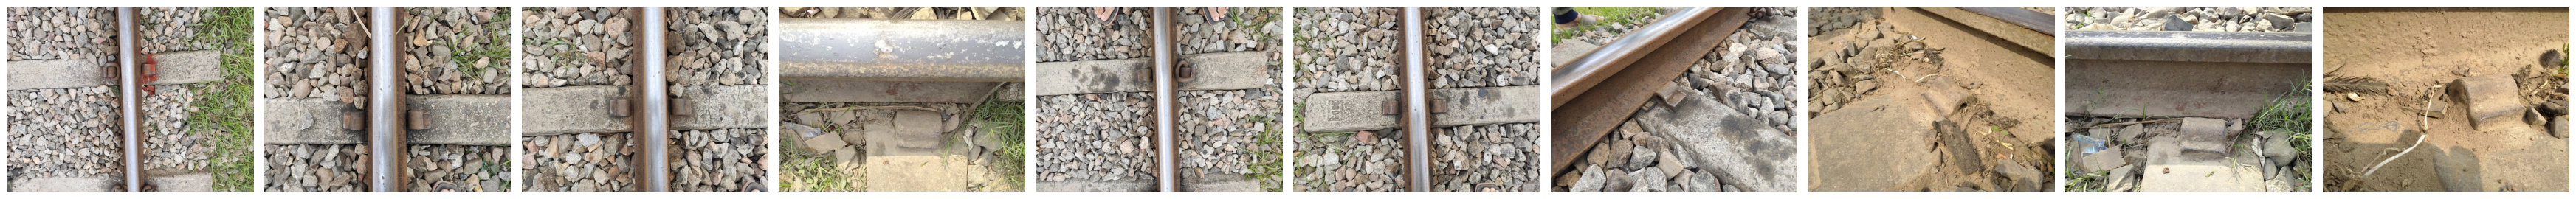

In [8]:
print("")
print("Trained data for Defective train track:")
print("")
Images_details(dir_name_train_Defective)
print("")
plot_images(dir_name_train_Defective, 10)


Trainned data for non defective train track:

 ====== Images in:  dataset/Train/Non defective
images_count:	150
min_width:	4000
max_width:	4000
min_height:	3000
max_height:	3000



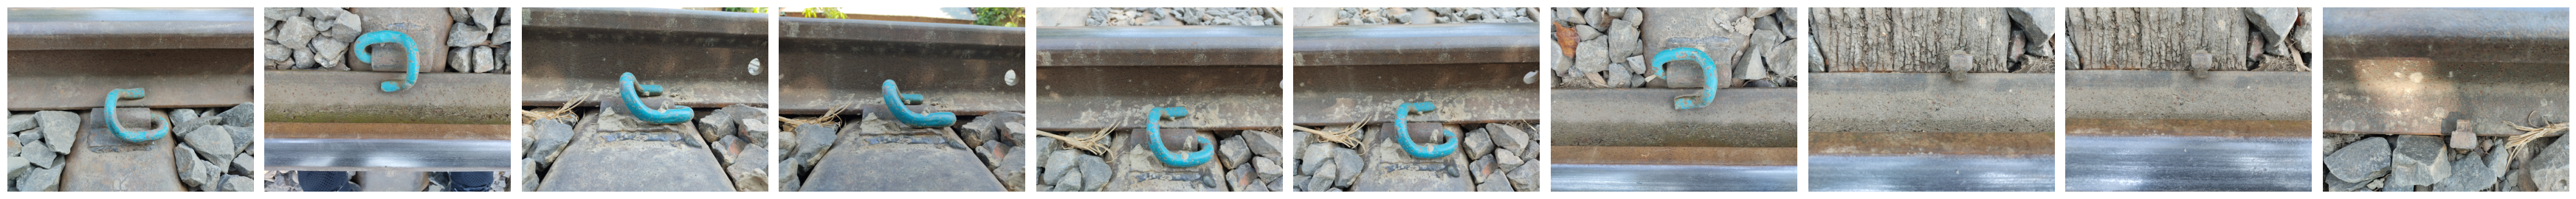

In [12]:
print("")
print("Trainned data for non defective train track:")
print("")
Images_details(dir_name_train_non_defective)
print("")
plot_images(dir_name_train_non_defective, 10)

In [10]:
Classifier=Sequential()
Classifier.add(Convolution2D(32,(3,3),input_shape=(250,250,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(38, activation='relu'))

In [11]:
Classifier.add(Dense(2, activation='softmax'))
Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [13]:
training_set=train_datagen.flow_from_directory('dataset/Train',target_size=(250,250),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('dataset/Validation',target_size=(250,250),batch_size=32,class_mode='categorical')

Found 299 images belonging to 2 classes.


Found 62 images belonging to 2 classes.


In [14]:
img_dims = 150
epochs = 20
batch_size = 32

In [15]:
#### Fitting the model
history = Classifier.fit_generator(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Epoch 1/20
9/9 [==============================] - 29s 2s/step - loss: 30.5628 - accuracy: 0.5206 - val_loss: 6.8489 - val_accuracy: 0.4062
Epoch 2/20
9/9 [==============================] - 19s 2s/step - loss: 7.4128 - accuracy: 0.4607 - val_loss: 6.7895 - val_accuracy: 0.3750
Epoch 3/20
9/9 [==============================] - 19s 2s/step - loss: 2.4458 - accuracy: 0.4644 - val_loss: 1.4780 - val_accuracy: 0.5000
Epoch 4/20
9/9 [==============================] - 19s 2s/step - loss: 0.8941 - accuracy: 0.5655 - val_loss: 0.6567 - val_accuracy: 0.6875
Epoch 5/20
9/9 [==============================] - 20s 2s/step - loss: 0.6682 - accuracy: 0.6442 - val_loss: 1.2215 - val_accuracy: 0.5312
Epoch 6/20
9/9 [==============================] - 27s 3s/step - loss: 0.6020 - accuracy: 0.7116 - val_loss: 0.7606 - val_accuracy: 0.5312
Epoch 7/20
9/9 [==============================] - 30s 4s/step - loss: 0.5636 - accuracy: 0.7004 - val_loss: 0.4781 - val_accuracy: 0.6562
Epoch 8/20
9/9 [=================

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [20]:
# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [16]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

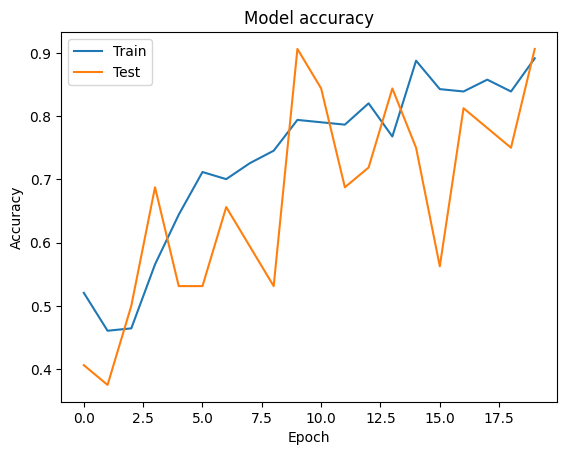

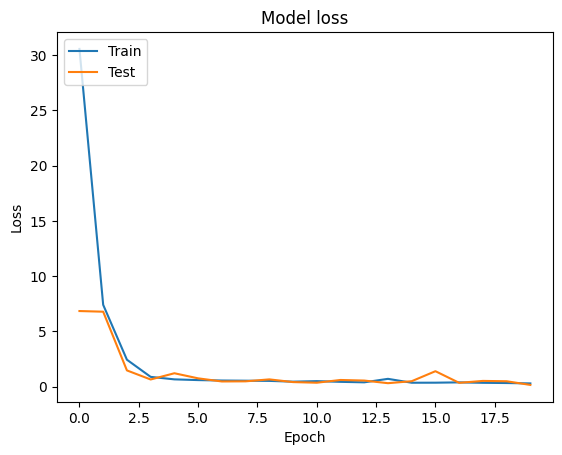

In [17]:
graph()

               precision    recall  f1-score   support

    Defective       0.48      0.52      0.50        31
Non defective       0.48      0.45      0.47        31

     accuracy                           0.48        62
    macro avg       0.48      0.48      0.48        62
 weighted avg       0.48      0.48      0.48        62



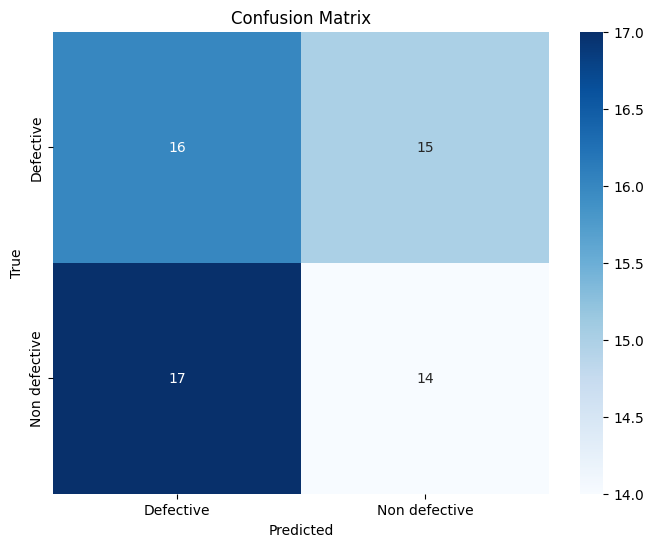

In [21]:
# Evaluate the model on the test set
test_set.reset()
y_true = test_set.classes
y_pred = np.argmax(Classifier.predict_generator(test_set, steps=len(test_set)), axis=1)

# Print classification report
class_names = list(test_set.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=class_names))

# Plot confusion matrix
plot_confusion_matrix(y_true, y_pred, class_names)

In [14]:
import visualkeras


visualkeras.layered_view(Classifier).show() # display using your system viewer
visualkeras.layered_view(Classifier, to_file='output_m1.png') # write to disk
visualkeras.layered_view(Classifier, to_file='output_m1.png').show() # write and show

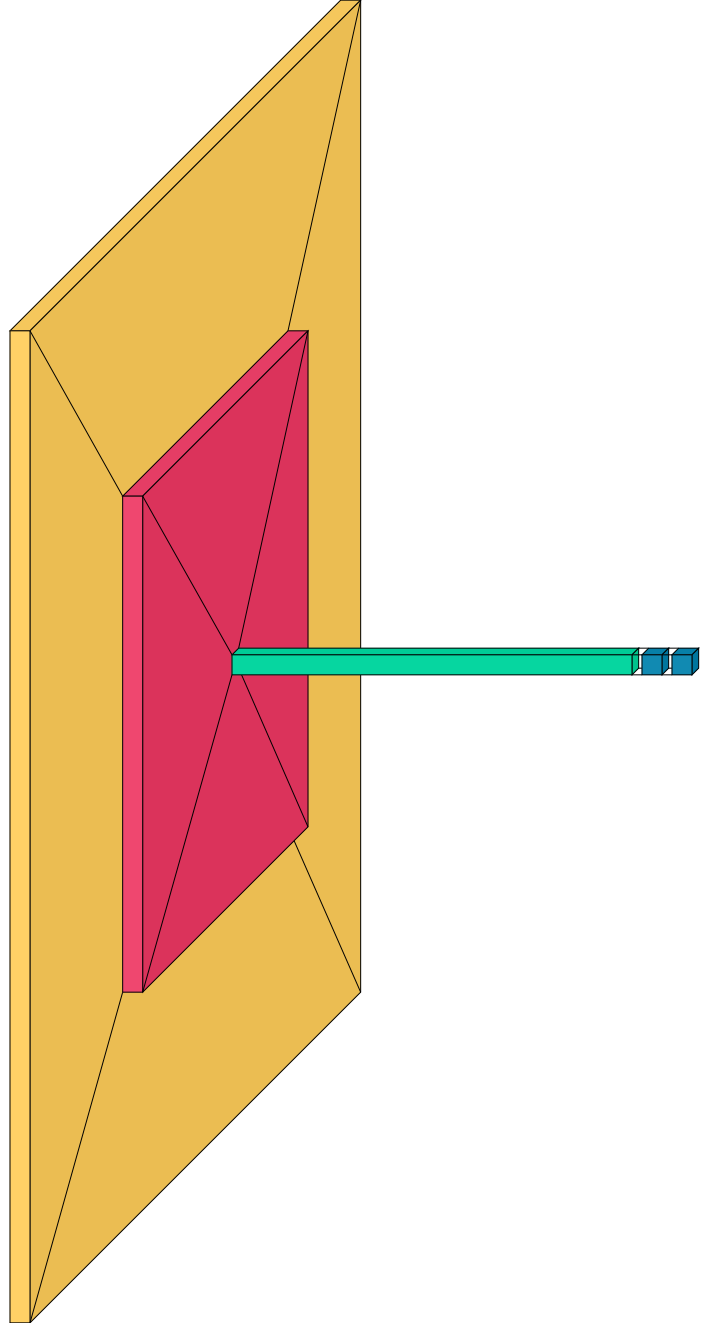

In [15]:
visualkeras.layered_view(Classifier)